In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
roll_df = pd.read_excel("D:\Credit Risk Model\Roll Rate Analysis\Roll rate.xlsx")
roll_df

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket
0,100393376629,2018-01-20,7.625,7.625,50000,32189.25,360,1999-12-19,216,2030-01-20,90,37,716,0,0
1,100393376629,2018-02-20,7.625,7.625,50000,32038.33,360,1999-12-19,217,2030-01-20,90,37,716,0,0
2,100393376629,2018-03-20,7.625,7.625,50000,31886.45,360,1999-12-19,218,2030-01-20,90,37,716,0,0
3,100393376629,2018-04-20,7.625,7.625,50000,31733.60,360,1999-12-19,219,2030-01-20,90,37,716,0,0
4,100393376629,2018-05-20,7.625,7.625,50000,31579.78,360,1999-12-19,220,2030-01-20,90,37,716,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198427,130749474686,2018-03-20,5.250,5.250,100000,11628.18,180,2005-07-20,151,2020-08-20,56,19,791,0,0
198428,130749474686,2018-04-20,5.250,5.250,100000,10875.17,180,2005-07-20,152,2020-08-20,56,19,791,0,0
198429,130749474686,2018-05-20,5.250,5.250,100000,10118.87,180,2005-07-20,153,2020-08-20,56,19,791,0,0
198430,130749474686,2018-06-20,5.250,5.250,100000,9359.26,180,2005-07-20,154,2020-08-20,56,19,791,0,0


In [12]:
roll_df['Bucket'].value_counts()

Bucket
0    181475
1      8615
6      3489
2      2405
3      1147
4       742
5       559
Name: count, dtype: int64

In [13]:
report_pivot = roll_df.pivot_table(index = 'Loan Id',
                             values = 'Reporting Month',
                             aggfunc = 'count')
report_pivot

,Reporting Month
Loan Id,
100000556151,12
100000998165,12
100004945019,12
100005871083,12
100006191820,12
...,...
208357508938,12
208722682407,3
208880455718,8


In [14]:
roll_rate = pd.merge(roll_df , report_pivot , on = 'Loan Id' , how = 'left')
roll_rate

,Loan Id,Reporting Month_x,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket,Reporting Month_y
0,100393376629,2018-01-20,7.625,7.625,50000,32189.25,360,1999-12-19,216,2030-01-20,90,37,716,0,0,12
1,100393376629,2018-02-20,7.625,7.625,50000,32038.33,360,1999-12-19,217,2030-01-20,90,37,716,0,0,12
2,100393376629,2018-03-20,7.625,7.625,50000,31886.45,360,1999-12-19,218,2030-01-20,90,37,716,0,0,12
3,100393376629,2018-04-20,7.625,7.625,50000,31733.60,360,1999-12-19,219,2030-01-20,90,37,716,0,0,12
4,100393376629,2018-05-20,7.625,7.625,50000,31579.78,360,1999-12-19,220,2030-01-20,90,37,716,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198427,130749474686,2018-03-20,5.250,5.250,100000,11628.18,180,2005-07-20,151,2020-08-20,56,19,791,0,0,7
198428,130749474686,2018-04-20,5.250,5.250,100000,10875.17,180,2005-07-20,152,2020-08-20,56,19,791,0,0,7
198429,130749474686,2018-05-20,5.250,5.250,100000,10118.87,180,2005-07-20,153,2020-08-20,56,19,791,0,0,7
198430,130749474686,2018-06-20,5.250,5.250,100000,9359.26,180,2005-07-20,154,2020-08-20,56,19,791,0,0,7


In [15]:
roll_rate['Reporting Month_y'].value_counts()

Reporting Month_y
12    178572
11      3091
9       2772
8       2360
7       2268
10      2260
6       2136
5       1510
4       1344
3       1047
2        766
1        306
Name: count, dtype: int64

# Check 1 : If Reporting Month < 12 then remove that row from the data

In [16]:
roll_rate['Check_1'] = np.where(roll_rate['Reporting Month_y']<12 , 1, 0)
roll_rate['Check_1'].value_counts()

Check_1
0    178572
1     19860
Name: count, dtype: int64

In [17]:
roll_rate[~(roll_rate['Check_1']==1)]

,Loan Id,Reporting Month_x,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket,Reporting Month_y,Check_1
0,100393376629,2018-01-20,7.625,7.625,50000,32189.25,360,1999-12-19,216,2030-01-20,90,37,716,0,0,12,0
1,100393376629,2018-02-20,7.625,7.625,50000,32038.33,360,1999-12-19,217,2030-01-20,90,37,716,0,0,12,0
2,100393376629,2018-03-20,7.625,7.625,50000,31886.45,360,1999-12-19,218,2030-01-20,90,37,716,0,0,12,0
3,100393376629,2018-04-20,7.625,7.625,50000,31733.60,360,1999-12-19,219,2030-01-20,90,37,716,0,0,12,0
4,100393376629,2018-05-20,7.625,7.625,50000,31579.78,360,1999-12-19,220,2030-01-20,90,37,716,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198420,130747241872,2018-08-20,5.875,5.875,71000,53758.00,360,2005-09-20,154,2035-10-20,79,30,688,0,0,12,0
198421,130747241872,2018-09-20,5.875,5.875,71000,53601.19,360,2005-09-20,155,2035-10-20,79,30,688,0,0,12,0
198422,130747241872,2018-10-20,5.875,5.875,71000,53443.61,360,2005-09-20,156,2035-10-20,79,30,688,0,0,12,0
198423,130747241872,2018-11-20,5.875,5.875,71000,53285.26,360,2005-09-20,157,2035-10-20,79,30,688,0,0,12,0


In [18]:
roll_rate_cleaned = roll_rate[~(roll_rate['Check_1']==1)]
roll_rate_cleaned

,Loan Id,Reporting Month_x,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket,Reporting Month_y,Check_1
0,100393376629,2018-01-20,7.625,7.625,50000,32189.25,360,1999-12-19,216,2030-01-20,90,37,716,0,0,12,0
1,100393376629,2018-02-20,7.625,7.625,50000,32038.33,360,1999-12-19,217,2030-01-20,90,37,716,0,0,12,0
2,100393376629,2018-03-20,7.625,7.625,50000,31886.45,360,1999-12-19,218,2030-01-20,90,37,716,0,0,12,0
3,100393376629,2018-04-20,7.625,7.625,50000,31733.60,360,1999-12-19,219,2030-01-20,90,37,716,0,0,12,0
4,100393376629,2018-05-20,7.625,7.625,50000,31579.78,360,1999-12-19,220,2030-01-20,90,37,716,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198420,130747241872,2018-08-20,5.875,5.875,71000,53758.00,360,2005-09-20,154,2035-10-20,79,30,688,0,0,12,0
198421,130747241872,2018-09-20,5.875,5.875,71000,53601.19,360,2005-09-20,155,2035-10-20,79,30,688,0,0,12,0
198422,130747241872,2018-10-20,5.875,5.875,71000,53443.61,360,2005-09-20,156,2035-10-20,79,30,688,0,0,12,0
198423,130747241872,2018-11-20,5.875,5.875,71000,53285.26,360,2005-09-20,157,2035-10-20,79,30,688,0,0,12,0


# Snapshot Method

#### source point is choosen 1 january 2018 && destination point is choosen 12 months after the source point as per the regulatory definition for snapshot method

In [56]:
roll_rate_cleaned[roll_rate_cleaned['Reporting Month_x']=='2018-01-20']['Loan Id']

0         100393376629
12        101153021562
24        101978414050
36        102212231837
48        104520606701
              ...     
198365    130699332150
198377    130742676465
198389    130742997486
198401    130746600244
198413    130747241872
Name: Loan Id, Length: 14881, dtype: int64

In [58]:
roll_rate_cleaned[roll_rate_cleaned['Reporting Month_x']=='2018-01-20']['Bucket']

0         0
12        1
24        0
36        0
48        0
         ..
198365    0
198377    0
198389    0
198401    0
198413    0
Name: Bucket, Length: 14881, dtype: int64

In [65]:
snapshot_table1 = pd.DataFrame()
snaphot_table1['Id'] = ''
snapshot_table1['source_pt']=''
snapshot_table2 = pd.DataFrame()
snaphot_table2['Id'] = ''
snapshot_table2['destination_pt']=''

In [70]:
snapshot_table1['Id'] = roll_rate_cleaned[roll_rate_cleaned['Reporting Month_x']=='2018-01-20']['Loan Id']
snapshot_table1['source_pt'] = roll_rate_cleaned[roll_rate_cleaned['Reporting Month_x']=='2018-01-20']['Bucket']
snapshot_table1

,source_pt,Id
0,0,100393376629
12,1,101153021562
24,0,101978414050
36,0,102212231837
48,0,104520606701
...,...,...
198365,0,130699332150
198377,0,130742676465
198389,0,130742997486
198401,0,130746600244


In [71]:
snapshot_table2['Id'] = roll_rate_cleaned[roll_rate_cleaned['Reporting Month_x']=='2018-12-20']['Loan Id']
snapshot_table2['destination_pt'] = roll_rate_cleaned[roll_rate_cleaned['Reporting Month_x']=='2018-12-20']['Bucket']
snapshot_table2

,destination_pt,Id
11,0,100393376629
23,0,101153021562
35,0,101978414050
47,0,102212231837
59,0,104520606701
...,...,...
198376,0,130699332150
198388,0,130742676465
198400,0,130742997486
198412,1,130746600244


In [72]:
snapshot_final = pd.merge(snapshot_table1,snapshot_table2,on = 'Id' , how='left')
snapshot_final

,source_pt,Id,destination_pt
0,0,100393376629,0
1,1,101153021562,0
2,0,101978414050,0
3,0,102212231837,0
4,0,104520606701,0
...,...,...,...
14876,0,130699332150,0
14877,0,130742676465,0
14878,0,130742997486,0
14879,0,130746600244,1


# Transition Table

In [109]:
transition_pivot = snapshot_final.pivot_table(
    index='source_pt',                 
    columns='destination_pt',               
    values='Id',       
    aggfunc='count',
     fill_value = 0) # Fill Nan with 0
transition_pivot

destination_pt,0,1,2,3,4,5,6
source_pt,,,,,,,
0,13025,339,73,33,20,9,34
1,373,226,63,28,11,11,23
2,72,49,27,16,8,5,19
3,56,20,12,12,2,5,14
4,50,15,4,2,0,3,16
5,32,8,4,0,3,2,12
6,33,7,6,3,3,3,90


In [112]:
rollback_matrix = np.tril(transition_pivot, k=-1)  # k=-1 excludes the diagonal
rollback = pd.DataFrame(rollback_matrix, index=transition_pivot.index, columns=transition_pivot.columns)

# Roll-forward: Upper triangular matrix (excluding diagonal)
rollforward_matrix = np.triu(transition_pivot, k=1)  # k=1 excludes the diagonal
rollforward = pd.DataFrame(rollforward_matrix, index=transition_pivot.index, columns=transition_pivot.columns)

# Calculating the sum for each row
transition_pivot['rollback'] = rollback.sum(axis=1)
transition_pivot['rollforward'] = rollforward.sum(axis=1)

# Display the updated table with rollback and rollforward columns
transition_pivot

destination_pt,0,1,2,3,4,5,6,rollback,rollforward
source_pt,,,,,,,,,
0,13025,339,73,33,20,9,34,0,508
1,373,226,63,28,11,11,23,373,136
2,72,49,27,16,8,5,19,121,48
3,56,20,12,12,2,5,14,88,21
4,50,15,4,2,0,3,16,71,19
5,32,8,4,0,3,2,12,47,12
6,33,7,6,3,3,3,90,55,0


In [117]:
transition_pivot.iloc[:,0:7].sum(axis=1)

source_pt
0    13533
1      735
2      196
3      121
4       90
5       61
6      145
dtype: int64

In [118]:
transition_pivot['rollback'] = (transition_pivot['rollback']/transition_pivot.iloc[:,0:7].sum(axis=1))*100
transition_pivot['rollforward'] = (transition_pivot['rollforward']/transition_pivot.iloc[:,0:7].sum(axis=1))*100
transition_pivot

destination_pt,0,1,2,3,4,5,6,rollback,rollforward
source_pt,,,,,,,,,
0,13025,339,73,33,20,9,34,0.000000,3.753787
1,373,226,63,28,11,11,23,50.748299,18.503401
2,72,49,27,16,8,5,19,61.734694,24.489796
3,56,20,12,12,2,5,14,72.727273,17.355372
4,50,15,4,2,0,3,16,78.888889,21.111111
5,32,8,4,0,3,2,12,77.049180,19.672131
6,33,7,6,3,3,3,90,37.931034,0.000000


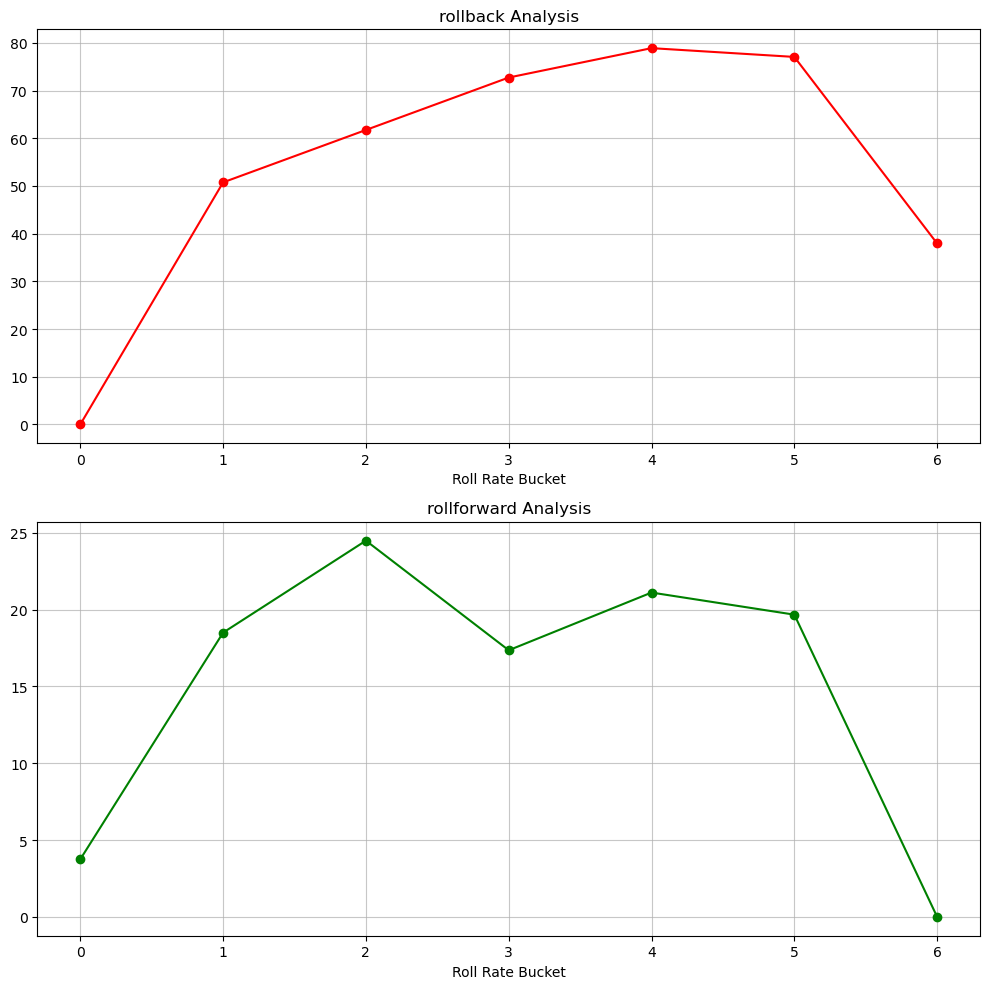

In [134]:
fig , axes = plt.subplots(nrows = 2, ncols = 1 , figsize = (10,10))
axes = axes.flatten()
colors = ['r' , 'g']
for i in range(2):
    axes[i].plot(transition_pivot.index, transition_pivot.iloc[:, 7 + i],color = colors[i], marker='o')

    # Set titles for rollback and roll-forward plots
    axes[i].set_title(f"{transition_pivot.columns[7 + i]} Analysis")
    axes[i].set_xlabel("Roll Rate Bucket")
    axes[i].grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()